# Overview

This project will take in NBA data provided by FiveThirtyEight to analyze comparisons between the Golden State Warriors and the New Jersey/Brooklyn Nets during the 2009 and 2013 NBA seasons 

In [1]:
import numpy as  np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.set_printoptions(suppress = True,  precision = 2)

In [3]:
nba = pd.read_csv("/users/dawit/downloads/nbagame.csv")

/var/folders/s7/z3cv1rpj31b7kyl_t8gcc7nm0000gn/T/ipykernel_15028/425515809.py:1: DtypeWarning: Columns (0,3,4,6,7,10,11,12,13,16,17,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  nba = pd.read_csv("/users/dawit/downloads/nbagame.csv")


In [75]:
# Subset Data to 2009 Season and 2013 Season

nba_2009 = nba[nba.year_id == 2009]
nba_2013 = nba[nba.year_id == 2013]

In [ ]:
print(nba_2009.head())
print(nba_2013.head())

In [27]:
# Compare points scored per game by the Warriors and the Nets in the 2009 season
warriors_pts_09 = nba_2009[nba_2009.fran_id == 'Warriors']['pts']
nets_pts_09 = nba_2009[nba_2009.fran_id == 'Nets']['pts']

In [28]:
# Calculate the difference between the two teams' average points
diff_means_2009 =  warriors_pts_09.mean() - nets_pts_09.mean()
print(diff_means_2009)

10.5


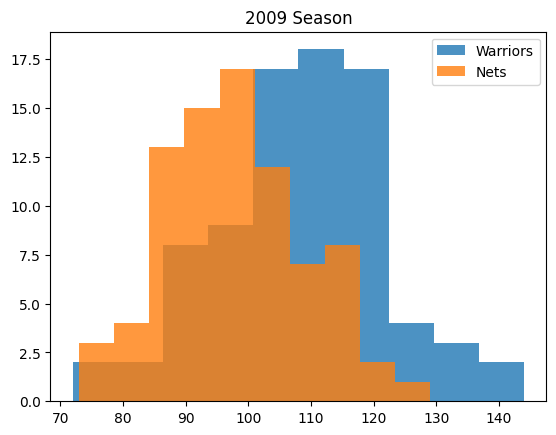

In [36]:
# Histogram to compare points scored per game by the Warriors and the Nets
plt.hist(warriors_pts_09, alpha = .8, label = 'Warriors')
plt.hist(nets_pts_09, alpha = .8, label = 'Nets')
plt.legend()
plt.title("2009 Season")
plt.show()

On average, we can see that the Warriors score more points per game than the Nets during the 2009 season. 

Now lets take a look at the comparison of points scored by these two teams during the 2013 season.

In [37]:
# Compare points scored per game by the Warriors and the Nets in the 2013 season
warriors_pts_13 = nba_2013[nba_2013.fran_id == 'Warriors']['pts']
nets_pts_13 = nba_2013[nba_2013.fran_id == 'Nets']['pts']

In [38]:
# Calculate the difference between the two teams' average points
diff_means_2013 =  warriors_pts_13.mean() - nets_pts_13.mean()
print(diff_means_2013)

4.283050442266315


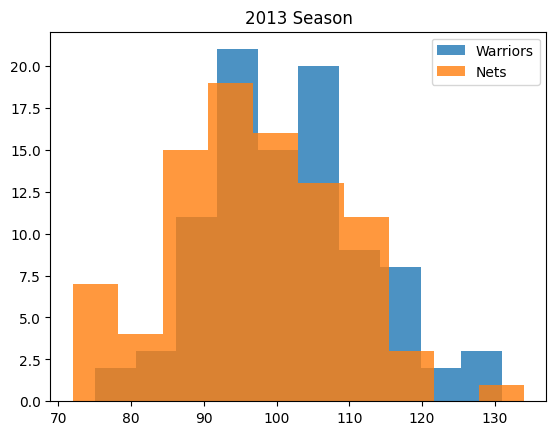

In [39]:
# Histogram to compare points scored per game by the Warriors and the Nets
plt.hist(warriors_pts_13, alpha = .8, label = 'Warriors')
plt.hist(nets_pts_13, alpha = .8, label = 'Nets')
plt.legend()
plt.title("2013 Season")
plt.show()

On average, we can see that the points scored per game by the Warriors and the Nets is pretty similar with a lot of overlap during the 2013 season. 

Now lets see if NBA teams during the 2013 season won more games at home or away. 

In [78]:
location_result_frequency =  pd.crosstab(nba_2013.game_result, nba_2013.game_location)
print(location_result_frequency)

game_location    A    H  N
game_result               
L              806  507  1
W              507  806  1


In [79]:
# We can calculate the proportion of the results of home and away games
location_result_proportions = location_result_frequency/len(nba_2013) 
print(location_result_proportions)

game_location         A         H         N
game_result                                
L              0.306697  0.192922  0.000381
W              0.192922  0.306697  0.000381


We can see that the general consensus is that NBA teams win more home games and lose more away games.

In [80]:
# We can predict the expected wins at home and away 
chi2, pval, dof, expected = chi2_contingency(location_result_frequency)
print(expected)
print(chi2)

[[656.5 656.5   1. ]
 [656.5 656.5   1. ]]
136.17821782178217


Thus shows that NBA teams during the 2013 season are expected to win 50% of home and away games. The chisquared value represents that there must be some relationship betweening winning and losing games and the games being played at home or away.

Now lets take a look at how many home and away games the Warriors and Nets won during the 2013 season.

In [ ]:
warriors_13 = nba_2013[nba_2013.fran_id == 'Warriors']
nets_13 = nba_2013[nba_2013.fran_id == 'Nets']

In [88]:
warriors_result_frequency =  pd.crosstab(warriors_13.game_result, warriors_13.game_location)
print(warriors_result_frequency)


game_location   A   H
game_result          
L              26  15
W              21  32


In [89]:
warriors_result_proportions = warriors_result_frequency/len(warriors_13) 
print(warriors_result_proportions)

game_location         A         H
game_result                      
L              0.276596  0.159574
W              0.223404  0.340426


The Warriors won more home games and lost more away games.

In [90]:
nets_result_frequency =  pd.crosstab(nets_13.game_result, nets_13.game_location)
print(nets_result_frequency)


game_location   A   H
game_result          
L              20  17
W              24  28


In [91]:
nets_result_proportions = nets_result_frequency/len(nets_13) 
print(nets_result_proportions)

game_location         A         H
game_result                      
L              0.224719  0.191011
W              0.269663  0.314607


The Nets also won more home games and lost more away games.

Unlike the expected outcomes the Warriors and Nets did not win half of their home and away games, but they both won more home games and lost more away games.